In [4]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt 
import cufflinks as cf
import chart_studio.plotly as py
cf.go_offline()
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import kpss
import bokeh as bk

In [5]:
df_QQQ = pd.read_csv(r'C:\Users\ronak\OneDrive\Desktop\stock-prediction-capstone\QQQ-holdings.csv')

In [6]:
df_QQQ

,Holding,Symbol,Weighting
0,Apple Inc.,AAPL,11.01%
1,Microsoft Corporation,MSFT,10.36%
2,"Amazon.com, Inc.",AMZN,7.74%
3,Tesla Inc,TSLA,4.7%
4,Alphabet Inc. Class C,GOOG,4.12%
...,...,...,...
98,Trip.com Group Ltd. Sponsored ADR,TCOM,0.12%
99,Check Point Software Technologies Ltd.,CHKP,0.11%
100,Incyte Corporation,INCY,0.1%
101,Fox Corporation Class A,FOXA,0.1%


In [7]:
df_QQQ_plot = df_QQQ[['Symbol', 'Weighting']]

In [8]:
df_QQQ_plot['Weighting'] = list(map(lambda x: x[:-1], df_QQQ_plot['Weighting'].values))

In [9]:
df_QQQ_plot['Weighting'] = [float(x) for x in df_QQQ_plot['Weighting'].values]

In [10]:
df_QQQ_plot.iplot(kind='bar',x='Symbol', y='Weighting', title='QQQ ETF Holdings Weight', theme='space')

In [37]:
df_QQQ_plot[0:10].iplot(kind='pie', labels='Symbol', values='Weighting', textinfo='label')

In [11]:
def get_finance_data(stock):
    s = yf.Ticker(stock)
    
    df = s.history(start = '2009-01-31', end='2021-10-18', interval = "1d")
    df = df.drop(['Dividends', 'Stock Splits'], axis=1)

    return df

In [12]:
aapl = get_finance_data('aapl')

## Apple Stock Markdown

In [5]:
aapl = get_finance_data('AAPL')

In [6]:
aapl = aapl.asfreq('D')

In [7]:
aapl = aapl.fillna(method='ffill')

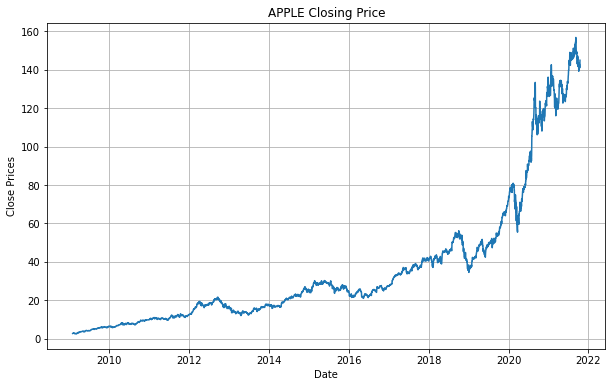

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(aapl['Close'])
plt.title('APPLE Closing Price')
plt.show()

<AxesSubplot:ylabel='Density'>

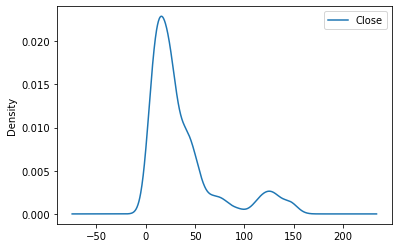

In [9]:
#Distribution of the dataset
aapl_close = aapl[['Close']]
aapl_close.plot(kind='kde')

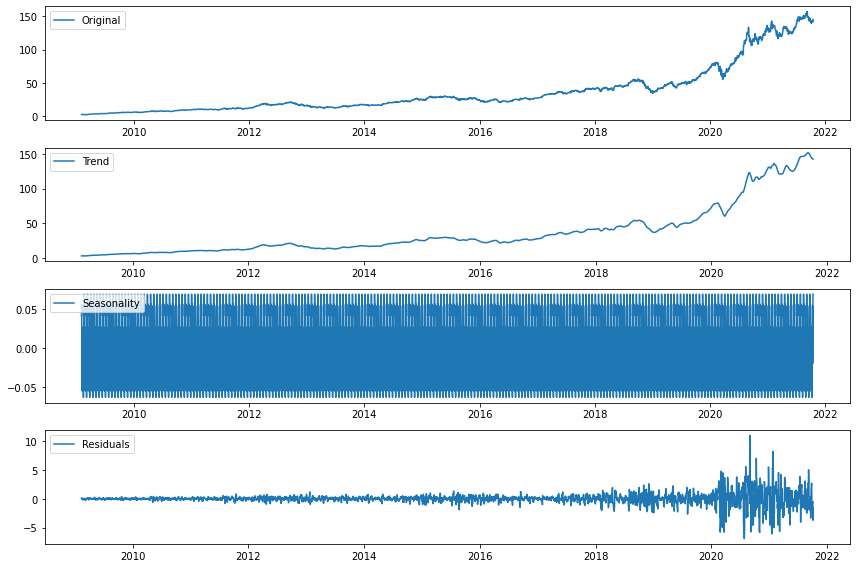

In [10]:
decomposition = seasonal_decompose(aapl_close, period = 20)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(aapl_close, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()